# minilab 2 assignment
# this assignment has 3 types of classifiers. 
- Logistic regression
- SVM
- Decision tree

### members
- Sangrae Cho
- Dilruksha Jayaweera 
- Kumar Pradeep
- Kevin Thompson


In [47]:
###
##   Business Understanding
##
# 
from IPython.core.display import display, HTML
from IPython.display import IFrame
display(HTML('''<h1>


Chicago is one of the largest cities in United States.It is the third most populous city in the United states 
with 2.7 Million people. The city is about 228 square miles and the urban area is around 2000 square miles. 
Chicago’s weather conditions vary from cold days of snow to hot 100 degrees summers. The roadways supporting 
the populations is busy throughout the year.The city government works to better the public safety on the roads. 
On the roadways of Chicago, there are numerous accidents every year. Chicago police department collects detailed 
data about every vehicle crash incident. They want to use this data to find ways to avoid serious crashes involving injury and fatality.

Source of the data is at link 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if


</h1>'''))


In [48]:
import pandas as pd
from  pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import datasets
from ipywidgets import widgets
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
path = "data/TrafficCrashesChicago.csv"
pd.options.display.max_columns=60
df = pd.read_csv(path)
#print(df['CRASH_DATE'].head())


In [49]:
df.head(5)

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/04/2019 11:05:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/30/2019 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/10/2019 05:35:00 PM,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/16/2019 04:53:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/17/2019 06:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [50]:
# Create a seperate month and year column from the CRASH_DATE column
#
month_of_year = list()
year_of_crash = list()
for e in df['CRASH_DATE']:
     month_of_year.append(pd.Timestamp(e).month)
     year_of_crash.append(pd.Timestamp(e).year) 
    
df_new = pd.DataFrame(list(zip(month_of_year,year_of_crash)), columns=['MONTH','YEAR'])

frames = [df, df_new.astype(int)]
df = pd.concat(frames, axis=1)
df.head()


,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,MONTH,YEAR
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/04/2019 11:05:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),7,2019
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/30/2019 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),7,2019
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/10/2019 05:35:00 PM,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),8,2019
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/16/2019 04:53:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),8,2019
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/17/2019 06:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),8,2019


YEAR       2013 2014             2015                                         \
MONTH        3    1  2  6  8  11   1  2  4  5  6   7    8     9     10    11   
CRASH_TYPE                                                                     
INJURY        1    1  0  0  0  0    0  0  0  1  0   1   26    95   208   229   
NO_INJURY     0    1  1  1  1  1    2  1  3  2  3  14  421  1430  2600  2379   

YEAR              2016                                                        \
MONTH         12    1     2     3     4     5     6     7     8     9     10   
CRASH_TYPE                                                                     
INJURY       242   256   212   278   281   271   267   303   428   474   539   
NO_INJURY   2174  2509  2328  2643  2623  2822  2572  3018  4033  4239  4458   

YEAR                    2017  ...                                2018        \
MONTH         11    12    1   ...    8     9     10    11    12    1     2    
CRASH_TYPE                    ...       

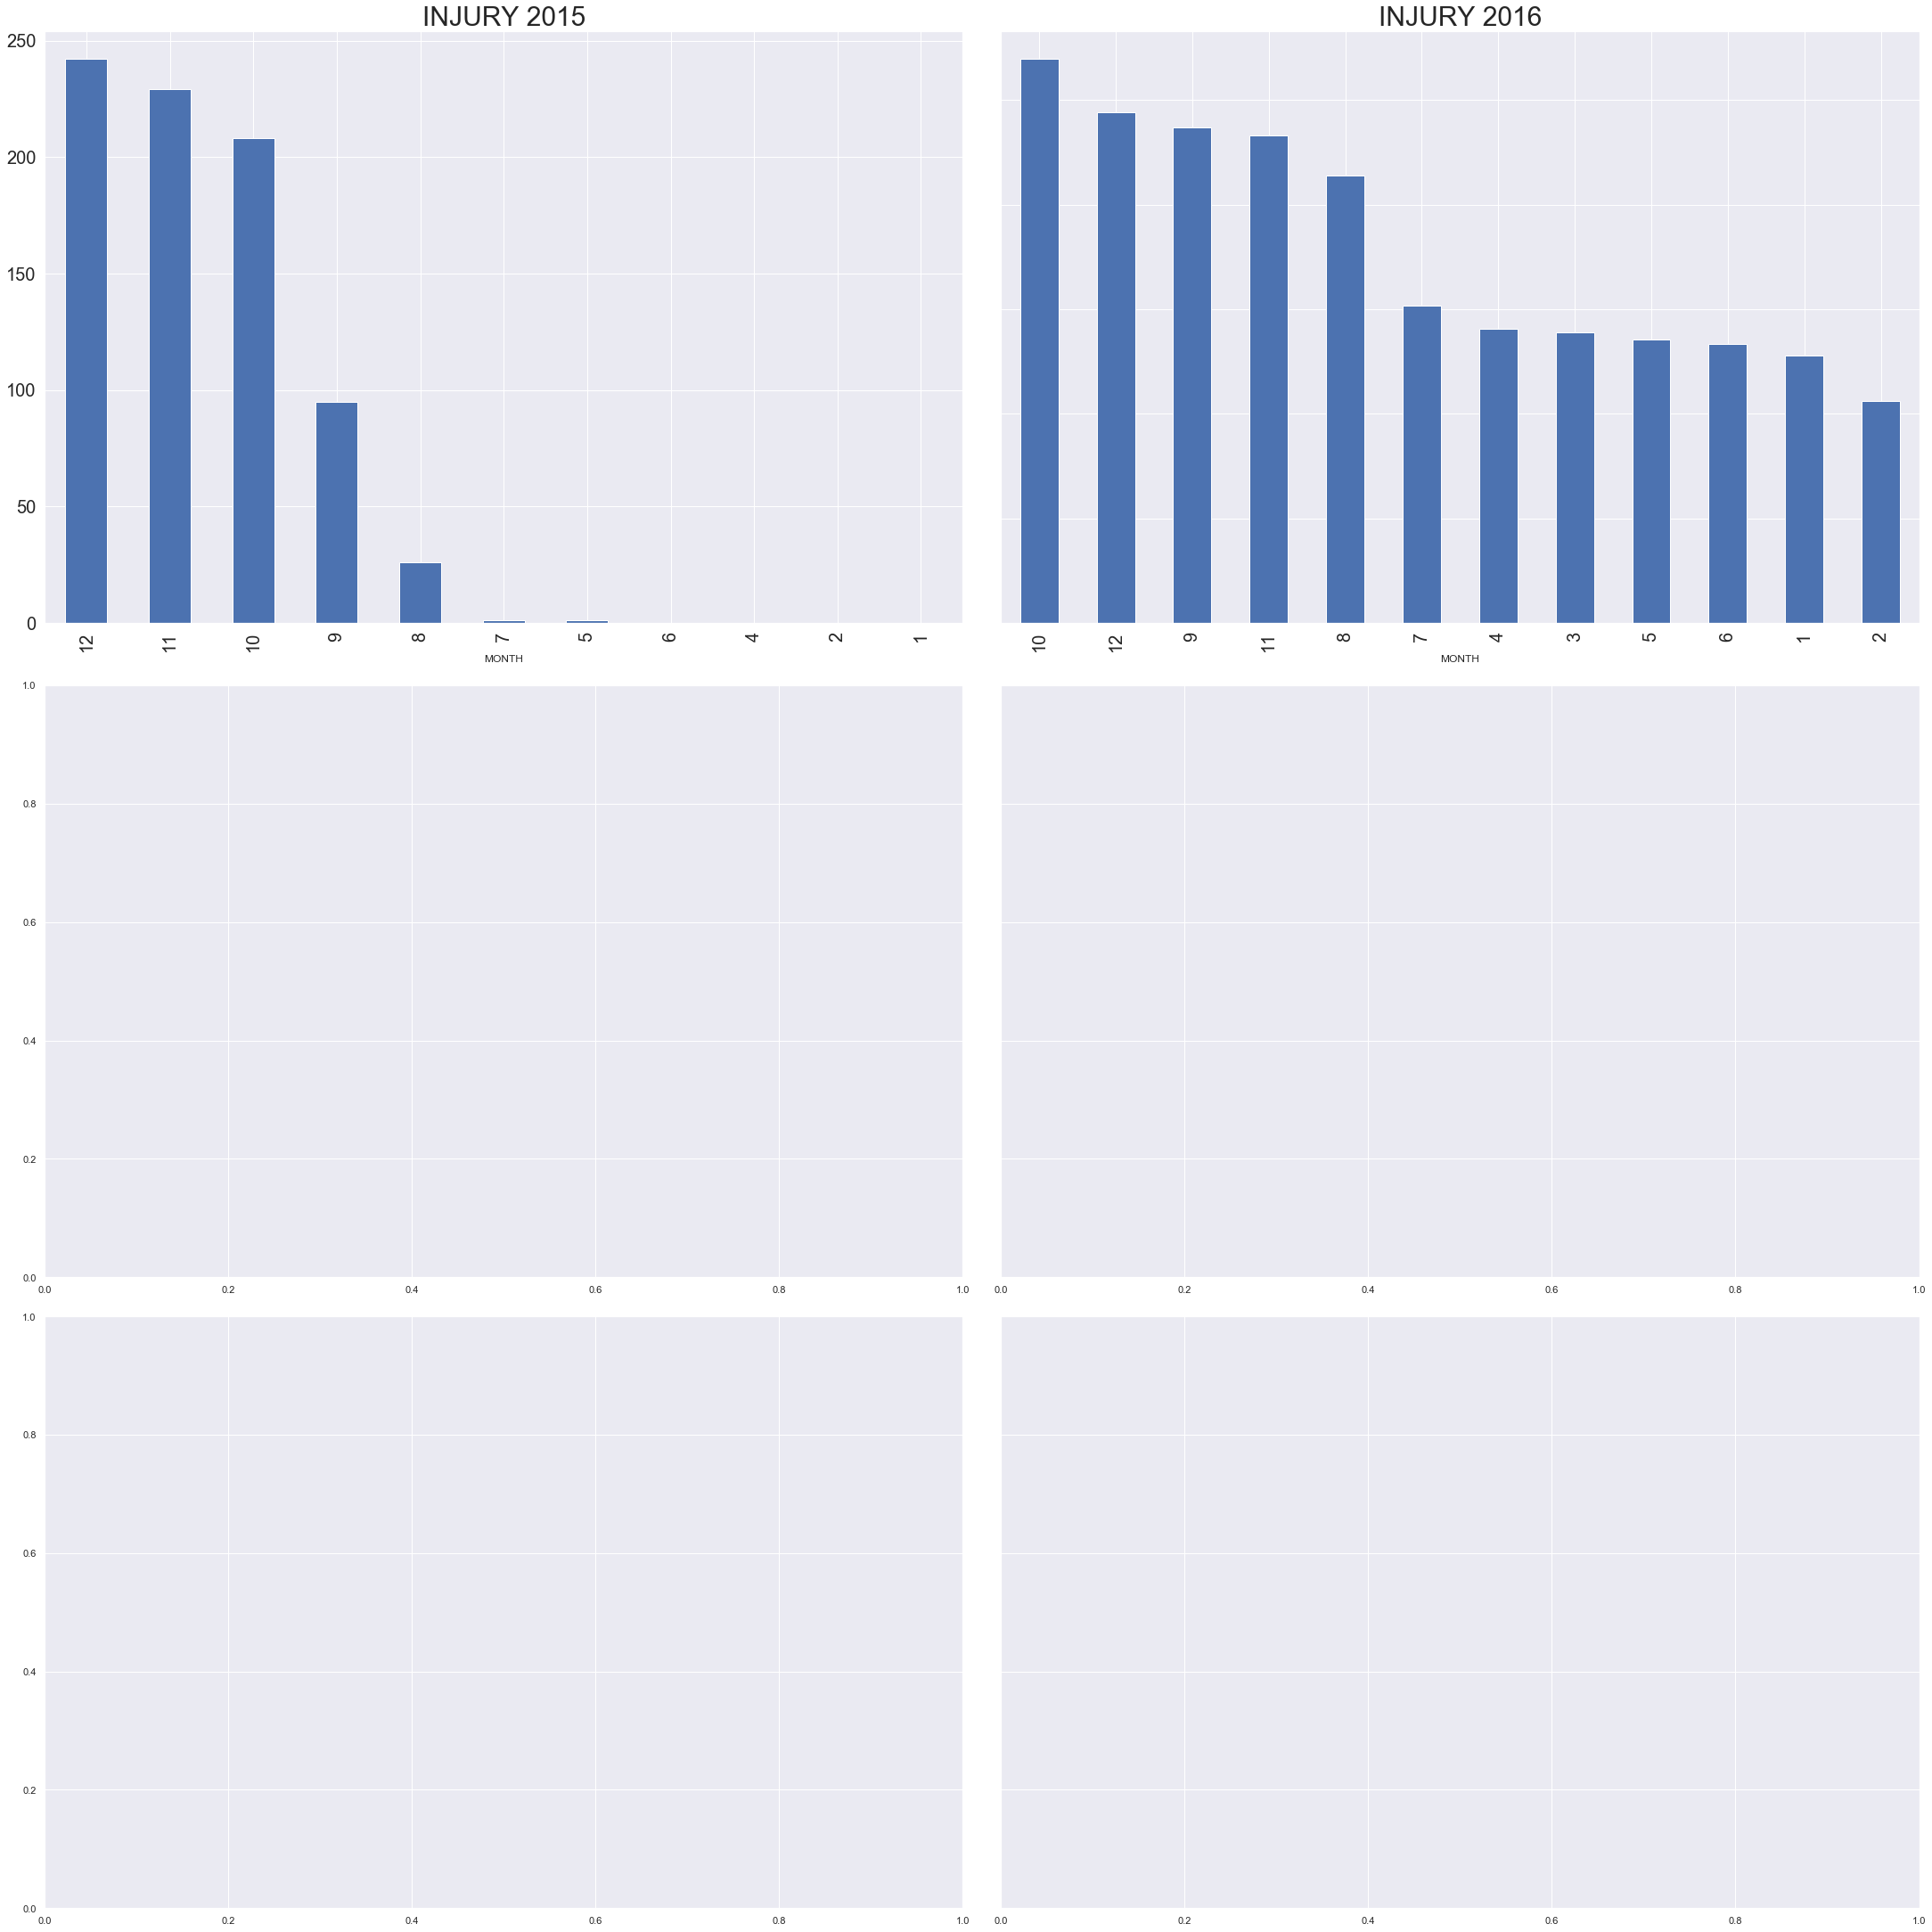

In [51]:
df_new = pd.DataFrame.copy(df)

df_new.replace({'CRASH_TYPE': r'NO INJURY.*$'}, {'CRASH_TYPE': 'NO_INJURY'}, regex=True, inplace=True)
df_new.replace({'CRASH_TYPE': r'INJURY AND.*$'}, {'CRASH_TYPE': 'INJURY'}, regex=True, inplace=True)


df_bytime1 = pd.crosstab(df_new['CRASH_TYPE'],[df_new['YEAR'],df_new['MONTH']])

print(df_bytime1)
# Plot of 2016 data is very different from 2017 , 2018 and 2019
# so for our analysis , we are considering only 2017 and above 

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)


df_view = df_bytime1.xs('INJURY').xs(2015)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2015', fontsize=20)
a[0,0].title.set_size(30)

df_view = df_bytime1.xs('INJURY').xs(2016)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='INJURY 2016', fontsize=20)
a[0,1].title.set_size(30)



In [52]:
# Taking only data of year 2017 and after since the previous years have very varied distributions for which
# the reasons needs to be explored.
# For now, we can assume that the data was collected at limited areas may be because they were running a pilot project.

df = df[df['YEAR']>=2017]


In [53]:
##
##  Describe the meaning and type of data and its scale 
##

'''
The description of data is generated by Pandas profile.
The data consists of 47 features and 377630 rows.
There are 23 categorical variables, 15 numberical and 10 boolean variables.

A brief description of variable is as below. More can be found on the source page 
https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

RD_NO = Is a unique ID for each crash . This ID can also be used to refer to vehicle database and people database.
        The type of data is TEXT.

CRASH_DATE_EST_I = Crash date estimated by desk officer or reporting party. The type of data is TEXT.

CRASH_DATE = Date and time of crash as entered by the reporting officer. The type of data is Floating time stamp.

POSTED_SPEED_LIMIT = Posted speed limit, as determined by reporting officer. The data is numberical.

TRAFFIC_CONTROL_DEVICE = Traffic control device present at crash location, as determined by reporting officer
DEVICE_CONDITION = Condition of traffic control device, as determined by reporting officer
WEATHER_CONDITION = Weather condition at time of crash, as determined by reporting officer
LIGHTING_CONDITION = Light condition at time of crash, as determined by reporting officer
FIRST_CRASH_TYPE = Type of first collision in crash
TRAFFICWAY_TYPE = Trafficway type, as determined by reporting officer
LANE_CNT = Total number of through lanes in either direction, excluding turn lanes, as determined by reporting officer (0 = intersection)
ALIGNMENT = Street alignment at crash location, as determined by reporting officer
ROADWAY_SURFACE_COND = Road surface condition, as determined by reporting officer
ROAD_DEFECT = Road defects, as determined by reporting officer
REPORT_TYPE = Administrative report type (at scene, at desk, amended)
CRASH_TYPE = A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away
INTERSECTION_RELATED_I = A field observation by the police officer whether an intersection played a role in the crash. 
                        Does not represent whether or not the crash occurred within the intersection.
                        
NOT_RIGHT_OF_WAY_I = Whether the crash begun or first contact was made outside of the public right-of-way.
HIT_AND_RUN_I = Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid
DAMAGE = A field observation of estimated damage.
DATE_POLICE_NOTIFIED = Calendar date on which police were notified of the crash
PRIM_CONTRIBUTORY_CAUSE = The factor which was most significant in causing the crash, as determined by officer judgment
SEC_CONTRIBUTORY_CAUSE = The factor which was second most significant in causing the crash, as determined by officer judgment
STREET_NO = Street address number of crash location, as determined by reporting officer
STREET_DIRECTION = Street address direction (N,E,S,W) of crash location, as determined by reporting officer
STREET_NAME = Street address name of crash location, as determined by reporting officer
BEAT_OF_OCCURRENCE = Chicago Police Department Beat ID. Boundaries available at https://data.cityofchicago.org/d/aerh-rz74
PHOTOS_TAKEN_I = Whether the Chicago Police Department took photos at the location of the crash
STATEMENTS_TAKEN_I = Whether statements were taken from unit(s) involved in crash
DOORING_I = Whether crash involved a motor vehicle occupant opening a door into the travel path of a bicyclist, causing a crash
WORK_ZONE_I = Whether the crash occurred in an active work zone
WORK_ZONE_TYPE = The type of work zone, if any
WORKERS_PRESENT_I = Whether construction workers were present in an active work zone at crash location
NUM_UNITS = Number of units involved in the crash. A unit can be a motor vehicle, a pedestrian, a bicyclist, or 
            another non-passenger roadway user.Each unit represents a mode of traffic with an independent trajectory.

MOST_SEVERE_INJURY = Most severe injury sustained by any person involved in the crash
INJURIES_TOTAL = Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries as 
                determined by the reporting officer

INJURIES_FATAL = Total persons sustaining fatal injuries in the crash
INJURIES_INCAPACITATING = Total persons sustaining incapacitating/serious injuries in the crash as determined 
                    by the reporting officer. Any injury other than fatal injury, which prevents the injured person from walking, 
                    driving, or normally continuing the activities they were capable of performing before the injury occurred. 
                    Includes severe lacerations, broken limbs, skull or chest injuries, and abdominal injuries.



'''

'\nThe description of data is generated by Pandas profile.\nThe data consists of 47 features and 377630 rows.\nThere are 23 categorical variables, 15 numberical and 10 boolean variables.\n\nA brief description of variable is as below. More can be found on the source page \nhttps://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if\n\nRD_NO = Is a unique ID for each crash . This ID can also be used to refer to vehicle database and people database.\n        The type of data is TEXT.\n\nCRASH_DATE_EST_I = Crash date estimated by desk officer or reporting party. The type of data is TEXT.\n\nCRASH_DATE = Date and time of crash as entered by the reporting officer. The type of data is Floating time stamp.\n\nPOSTED_SPEED_LIMIT = Posted speed limit, as determined by reporting officer. The data is numberical.\n\nTRAFFIC_CONTROL_DEVICE = Traffic control device present at crash location, as determined by reporting officer\nDEVICE_CONDITION = Condition of traffic control devic

In [54]:
'''
 # Missing data and the way to deal with the missing data
 
 CRASH_DATE_EST_I is a TEXT field and it has 92.6% missing values. This field is recorded at the office instead of the crash site.
 This normally happens when it is a minor crash which does not gets immediately reported.
 This also happens when the officer was not called onsite.
 The missing data in this field can be substituted from CRASH_DATE field which has 0% missing data.
 
 POSTED_SPEED_LIMIT has 1.7% of data which is zero. Even though there are speed limits posted every where on streets, 
 there can be parking lots where speed is not posted. We can infer from the feature TRAFFICWAY_TYPE if the location is 
 parking lot or not. If it is parking lot, we can change the POSTED_SPEED to 5 mph. If the location is not parking lot , we can 
 derive the speed limit from suplimentary data about roads information by using the latitude and longitude values from this data set.
 If there are still some values of POSTED_SPEED_LIMIT which are zero, we can delete those rows.
 Also , there are errors in this field which has values like 1 mph , 2 mph as speed limits. We need to use suplimentray data to from 
 roads department data to fix these values. We can bin the values into 3 bins. Bin1 is 0-30 , Bin2 is 30-60 and Bin3 is 60-90.
 
 TRAFFIC_CONTROL_DEVICE and DEVICE_CONTROL has unknown type. We can consider this as error in entry and change it category 'NO CONTROLS' at all.
 
 WEATHER_CONDITION has unknown type. We can get the weather data corresponding to those days and change these values accordingly.
 
 LIGHTING_CONDITION has unknown type . We can change this unknown to , other known types based on time of the day and weather report data.
 
 LANE_CNT has 47% missing data and zeros. We can fix these entries by looking at road and transport department data.
 
 
 INJURIES_INCAPACITATING has zeros. We can consider this as categorical values with a scale 0 to 4. 
 Zero meaning, the INJURIES with least level of INCAPACITATING and 4 is more towards fatal.
 
 INJURIES_NON_INCAPACITATING has zeros. We can consider this as part of the scale from 0 to 4.
 
 HIT_AND_RUN_I has 72% missing. We can consider this field true if the crash report was done at office.
 
 
 
 REPORT_TYPE has 2.3% missing. This field can be derived from CRASH_DATE_EST_I or CRASH_DATE fields.
 
 CRASH_HOUR has 1.7% zeros. If the corresponding LIGHTING condition is available, we can adjust the CRASH_HOUR to fall in 
  average of day time or average of night time 
 
 '''

"\n # Missing data and the way to deal with the missing data\n \n CRASH_DATE_EST_I is a TEXT field and it has 92.6% missing values. This field is recorded at the office instead of the crash site.\n This normally happens when it is a minor crash which does not gets immediately reported.\n This also happens when the officer was not called onsite.\n The missing data in this field can be substituted from CRASH_DATE field which has 0% missing data.\n \n POSTED_SPEED_LIMIT has 1.7% of data which is zero. Even though there are speed limits posted every where on streets, \n there can be parking lots where speed is not posted. We can infer from the feature TRAFFICWAY_TYPE if the location is \n parking lot or not. If it is parking lot, we can change the POSTED_SPEED to 5 mph. If the location is not parking lot , we can \n derive the speed limit from suplimentary data about roads information by using the latitude and longitude values from this data set.\n If there are still some values of POSTED_

In [55]:

# Uncomment below lines to run pandas profiling

#profile = ProfileReport(df, minimal=True)
#profile

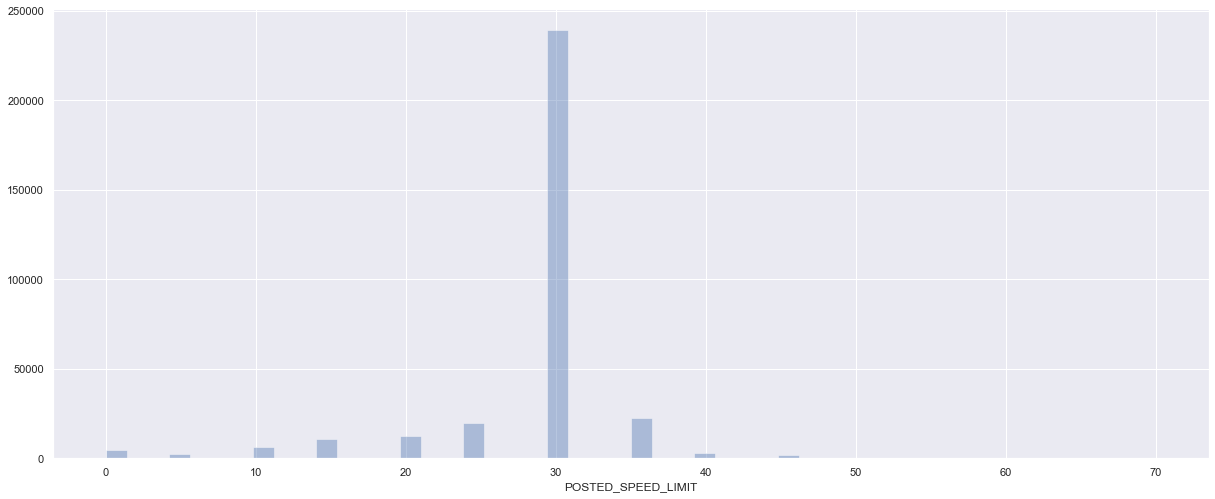

In [56]:
#profile.to_file("crash_data_report.html")
sns.set()
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.distplot(df.POSTED_SPEED_LIMIT,kde=False)

# The histogram below is left skewed

In [57]:
# Lets select few important features and use them to explore the data
# 
#df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
                   # 'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK',
                   # 'NUM_UNITS', 'DEVICE_CONDITION','MONTH','YEAR']]
df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
                    'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK', 'REPORT_TYPE',
                    'NUM_UNITS', 'DEVICE_CONDITION','MONTH','YEAR','DAMAGE','STREET_DIRECTION','BEAT_OF_OCCURRENCE']]
        
        
# Rename these columns to shorter names for better readibility of visuals
#
df_all_copy = pd.DataFrame.copy(df_all5)
df_all_copy.rename(columns={'POSTED_SPEED_LIMIT':'SP_LIM',
                            'ROAD_DEFECT':'ROAD', 
                            'LIGHTING_CONDITION':'LIGHT',
                            'WEATHER_CONDITION':'WEATHER',
                            'CRASH_DAY_OF_WEEK':'WEEKDAY',
                            'CRASH_TYPE':'CRASH',
                            'DEVICE_CONDITION':'DEVICE'}, inplace=True)

# Lets categorize the CRASH_TYPE to 2 levels. INJURY or NO_INJURY.
# All injury types are counted under INJURY

df_all_copy.replace(to_replace=r'NO INJURY.*$', value='NO_INJURY', regex=True, inplace=True)
df_all_copy.replace(to_replace=r'INJURY AND.*$', value='INJURY', regex=True, inplace=True)
#df_all_copy.replace(to_replace=r'INJURY AND.*$', value='INJURY', regex=True, inplace=True)

# Lets categorize lighting condition into 3 types. Day light, lighted streets and poorly light streets.
df_all_copy.replace(to_replace=r'DARKNESS, LIGHTED.*$', value='LIGHTED', regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)


# Weather condition into 2 categories. Clear or not clear
df_all_copy.replace({'WEATHER': r'^(?!CLEAR).*$'}, {'WEATHER': 'NO_CLEAR'}, regex=True, inplace=True)

# Road condition as defective or not defective 
df_all_copy.replace({'ROAD': r'^(?!NO DEFECTS).*$'}, {'ROAD': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'ROAD': r'^NO DEFECTS.*$'}, {'ROAD': 'NO_DEFECT'}, regex=True, inplace=True)

# Divide device condition into 3 categories
# No controls, working controls, defective controls
#df_all_copy.replace({'DEVICE_CONDITION': r'^(NO CONTROLS).*$'}, {'DEVICE_CONDITION': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(?!(NO CONTROLS)|(FUNCTIONING PROPERLY)).*$'},
                    {'DEVICE': 'DEFECTIVE'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(NO CONTROLS).*$'}, {'DEVICE': 'NO'}, regex=True, inplace=True)
df_all_copy.replace({'DEVICE': r'^(FUNCTIONING PROPERLY).*$'}, {'DEVICE': 'WORKING'}, regex=True, inplace=True)
df_all_copy.replace({'LIGHT': r'^(UNKNOWN|DUSK|DAWN).*$'}, {'LIGHT': 'POOR_LIGHT'}, regex=True, inplace=True)



In [58]:

# Convert speed limit to integer
df_all_copy['SP_LIM'] = df_all_copy['SP_LIM'].astype(int)

# Bin the speeds to 3 levels, Low , medium and high
df_all_copy['BINNED_SPEED'] = pd.cut((df_all_copy['SP_LIM']), 3, labels=['L','M','H'])

# For crash type ( injury or no) get the count of accidents based on speed limit and road condition
df_crosstab1 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy['BINNED_SPEED'], df_all_copy['ROAD']])

# For crash type , get the count of accidents based on speed limit and weather condition
df_crosstab2 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.WEATHER])

# For crash type, get the count of accidents based on speed limit and lighting condition
df_crosstab3 = pd.crosstab(df_all_copy['CRASH'], [df_all_copy.BINNED_SPEED, df_all_copy.LIGHT])

# For each speed type , get the count of accidents with weather and lighting conditions
df_crosstab4 = pd.crosstab(df_all_copy['BINNED_SPEED'], [df_all_copy.WEATHER, df_all_copy.LIGHT])

# For each crash type, get count of accidents with lighting, road condition, speed limit and traffic control device
df_crosstab5 = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['LIGHT'], df_all_copy['ROAD'], df_all_copy['BINNED_SPEED'], df_all_copy['DEVICE']] )

# For each crash typ e, get count of accidents for a particular year and month of that year
df_bytime = pd.crosstab(df_all_copy['CRASH'],[df_all_copy['YEAR'],df_all_copy['MONTH']])
#print(df_bytime)



In [59]:
by_month = pd.DataFrame( df_bytime.xs('INJURY').loc[[2017,2018,2019],1] )
#by_month.index
#plt.boxplot(by_month)
#by_month1 = df_bytime.xs('INJURY').loc[[2017,2018,2019],2]
#by_month1
#plt.boxplot(by_month1, labels=[2])

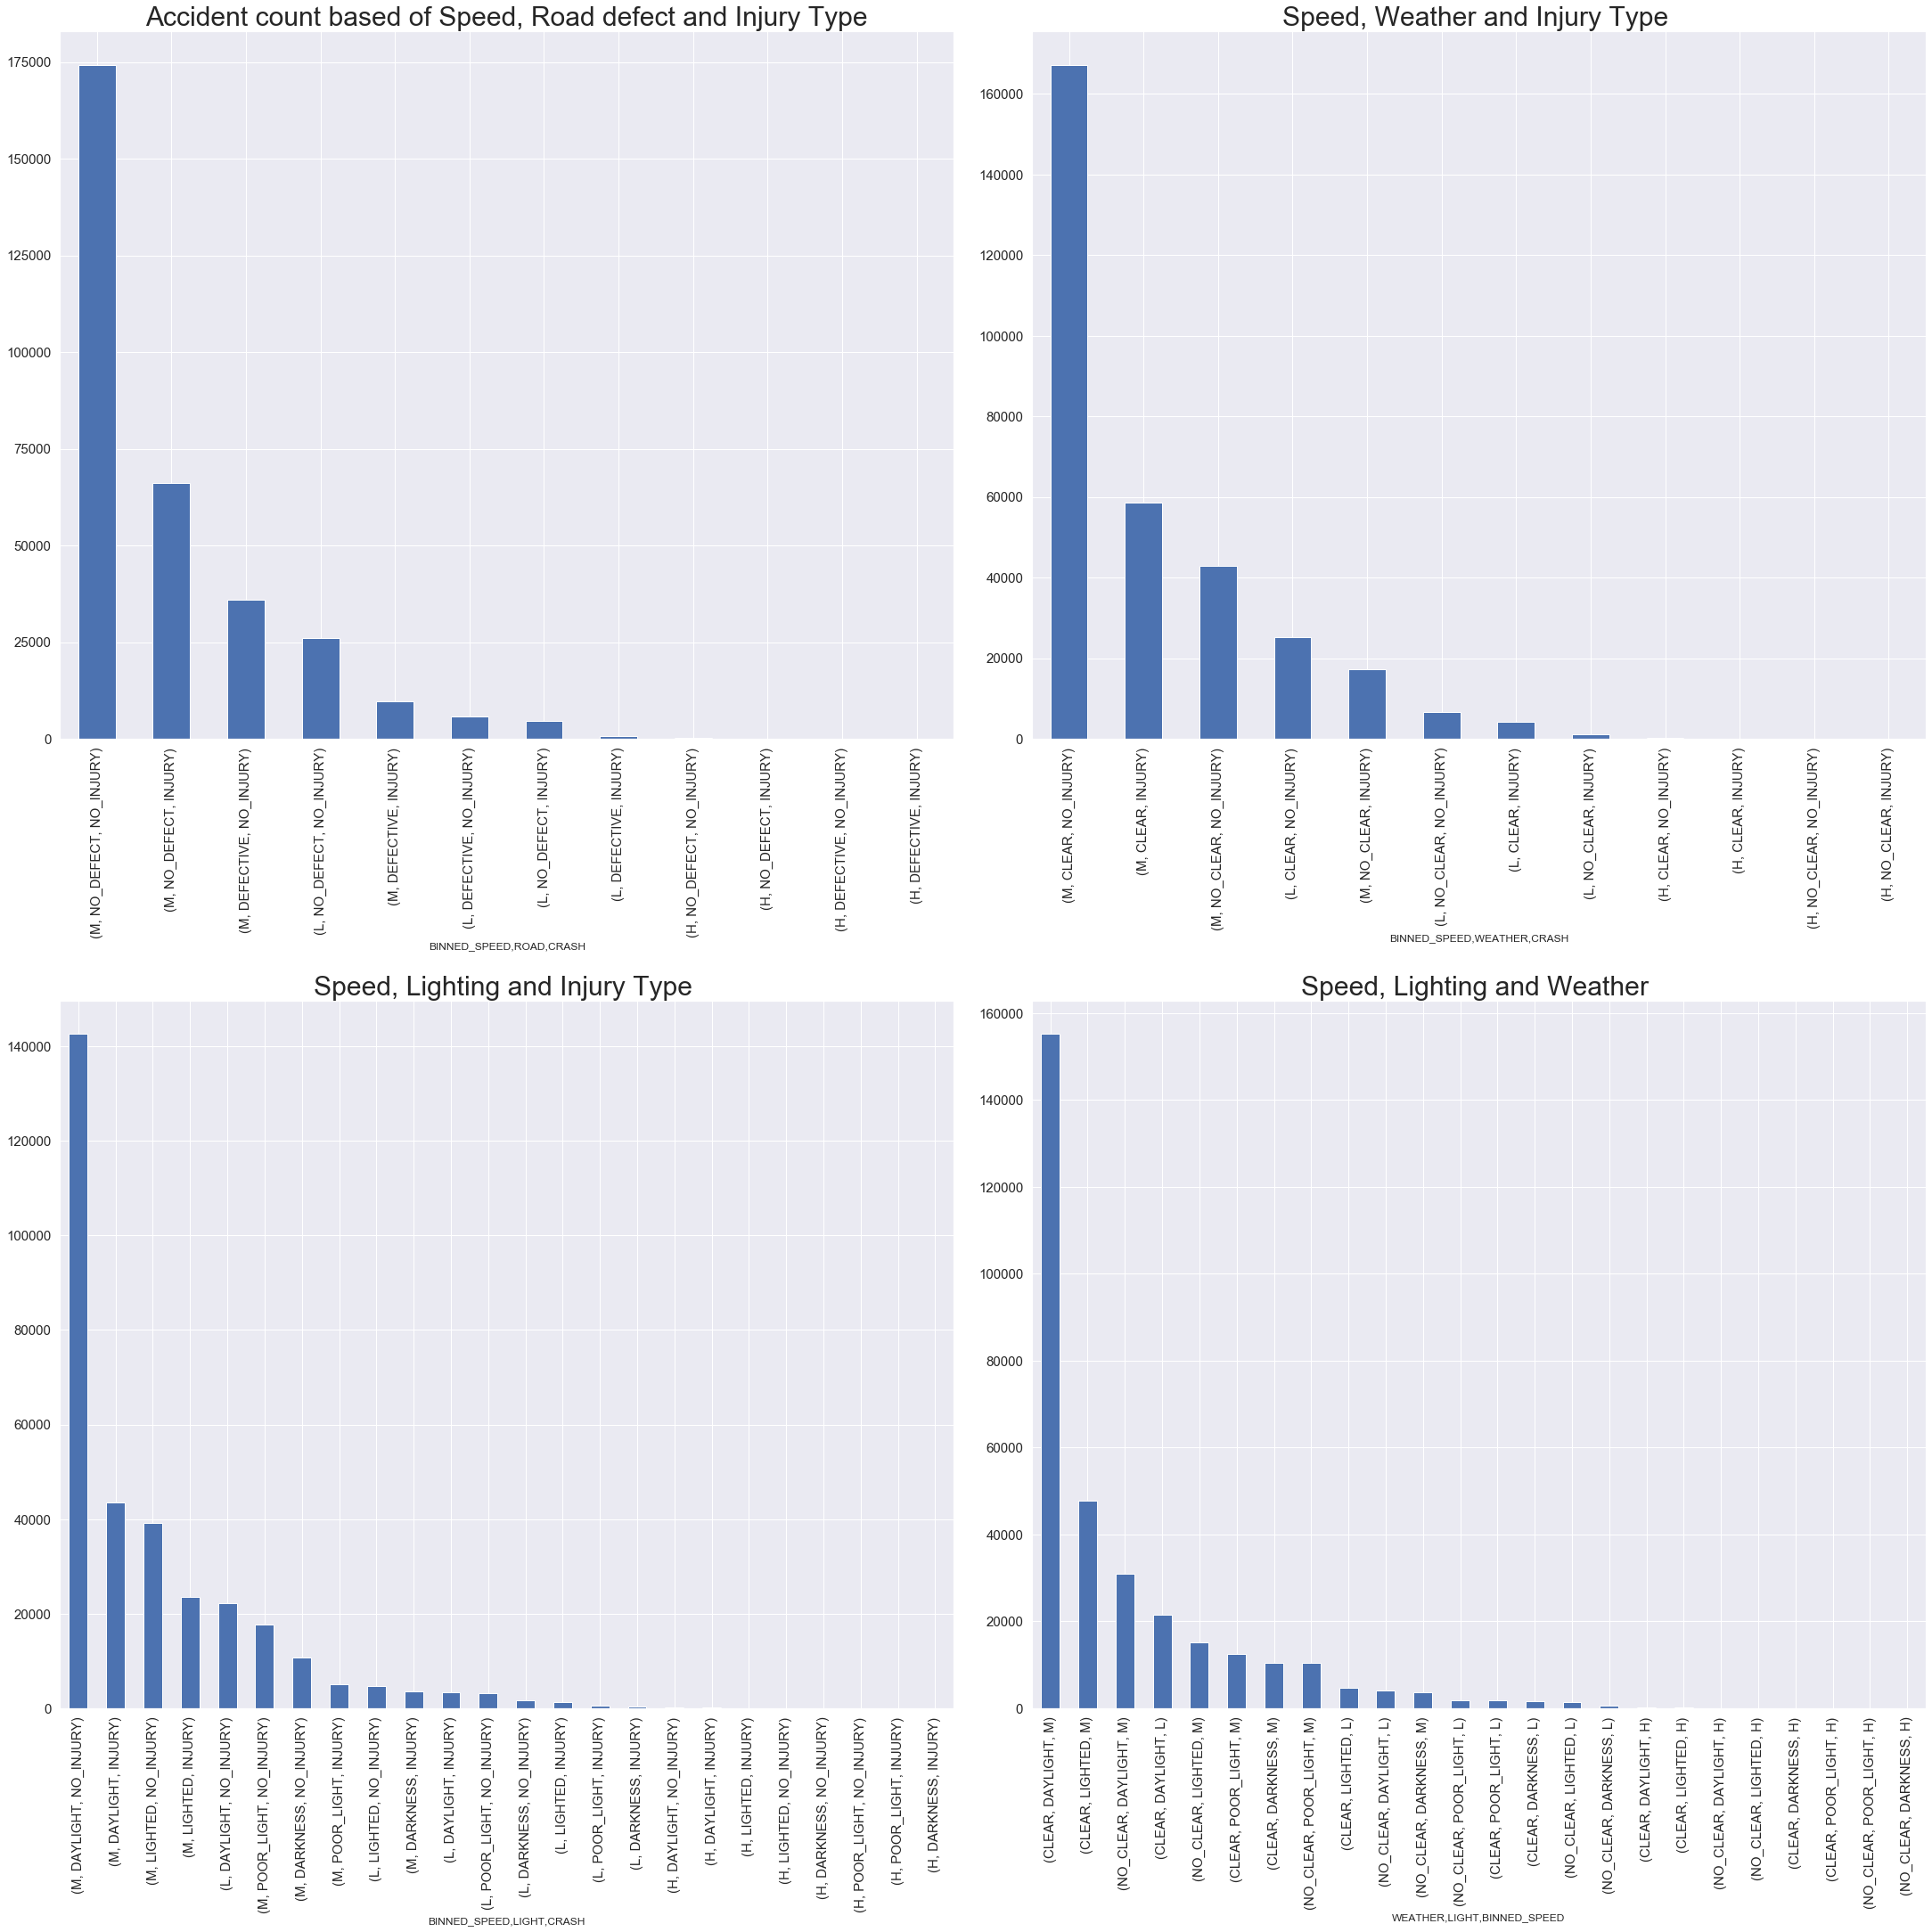

In [60]:

plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(2,2, frameon=True, sharex=False, constrained_layout=True)

df_view = df_crosstab1.unstack().sort_values(ascending=False)
df_view.plot(kind='bar', ax=a[0,0], fontsize=15, title='Accident count based of Speed, Road defect and Injury Type')
a[0,0].title.set_size(30)

df_view = df_crosstab2
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[0,1], fontsize=15, title='Speed, Weather and Injury Type ')
a[0,1].title.set_size(30)

df_view = df_crosstab3
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,0], fontsize=15, title='Speed, Lighting and Injury Type ' )
a[1,0].title.set_size(30)

df_view = df_crosstab4
df_view.unstack().sort_values(ascending=False).plot(kind='bar', ax=a[1,1], fontsize=15, title='Speed, Lighting and Weather ')
a[1,1].title.set_size(30)




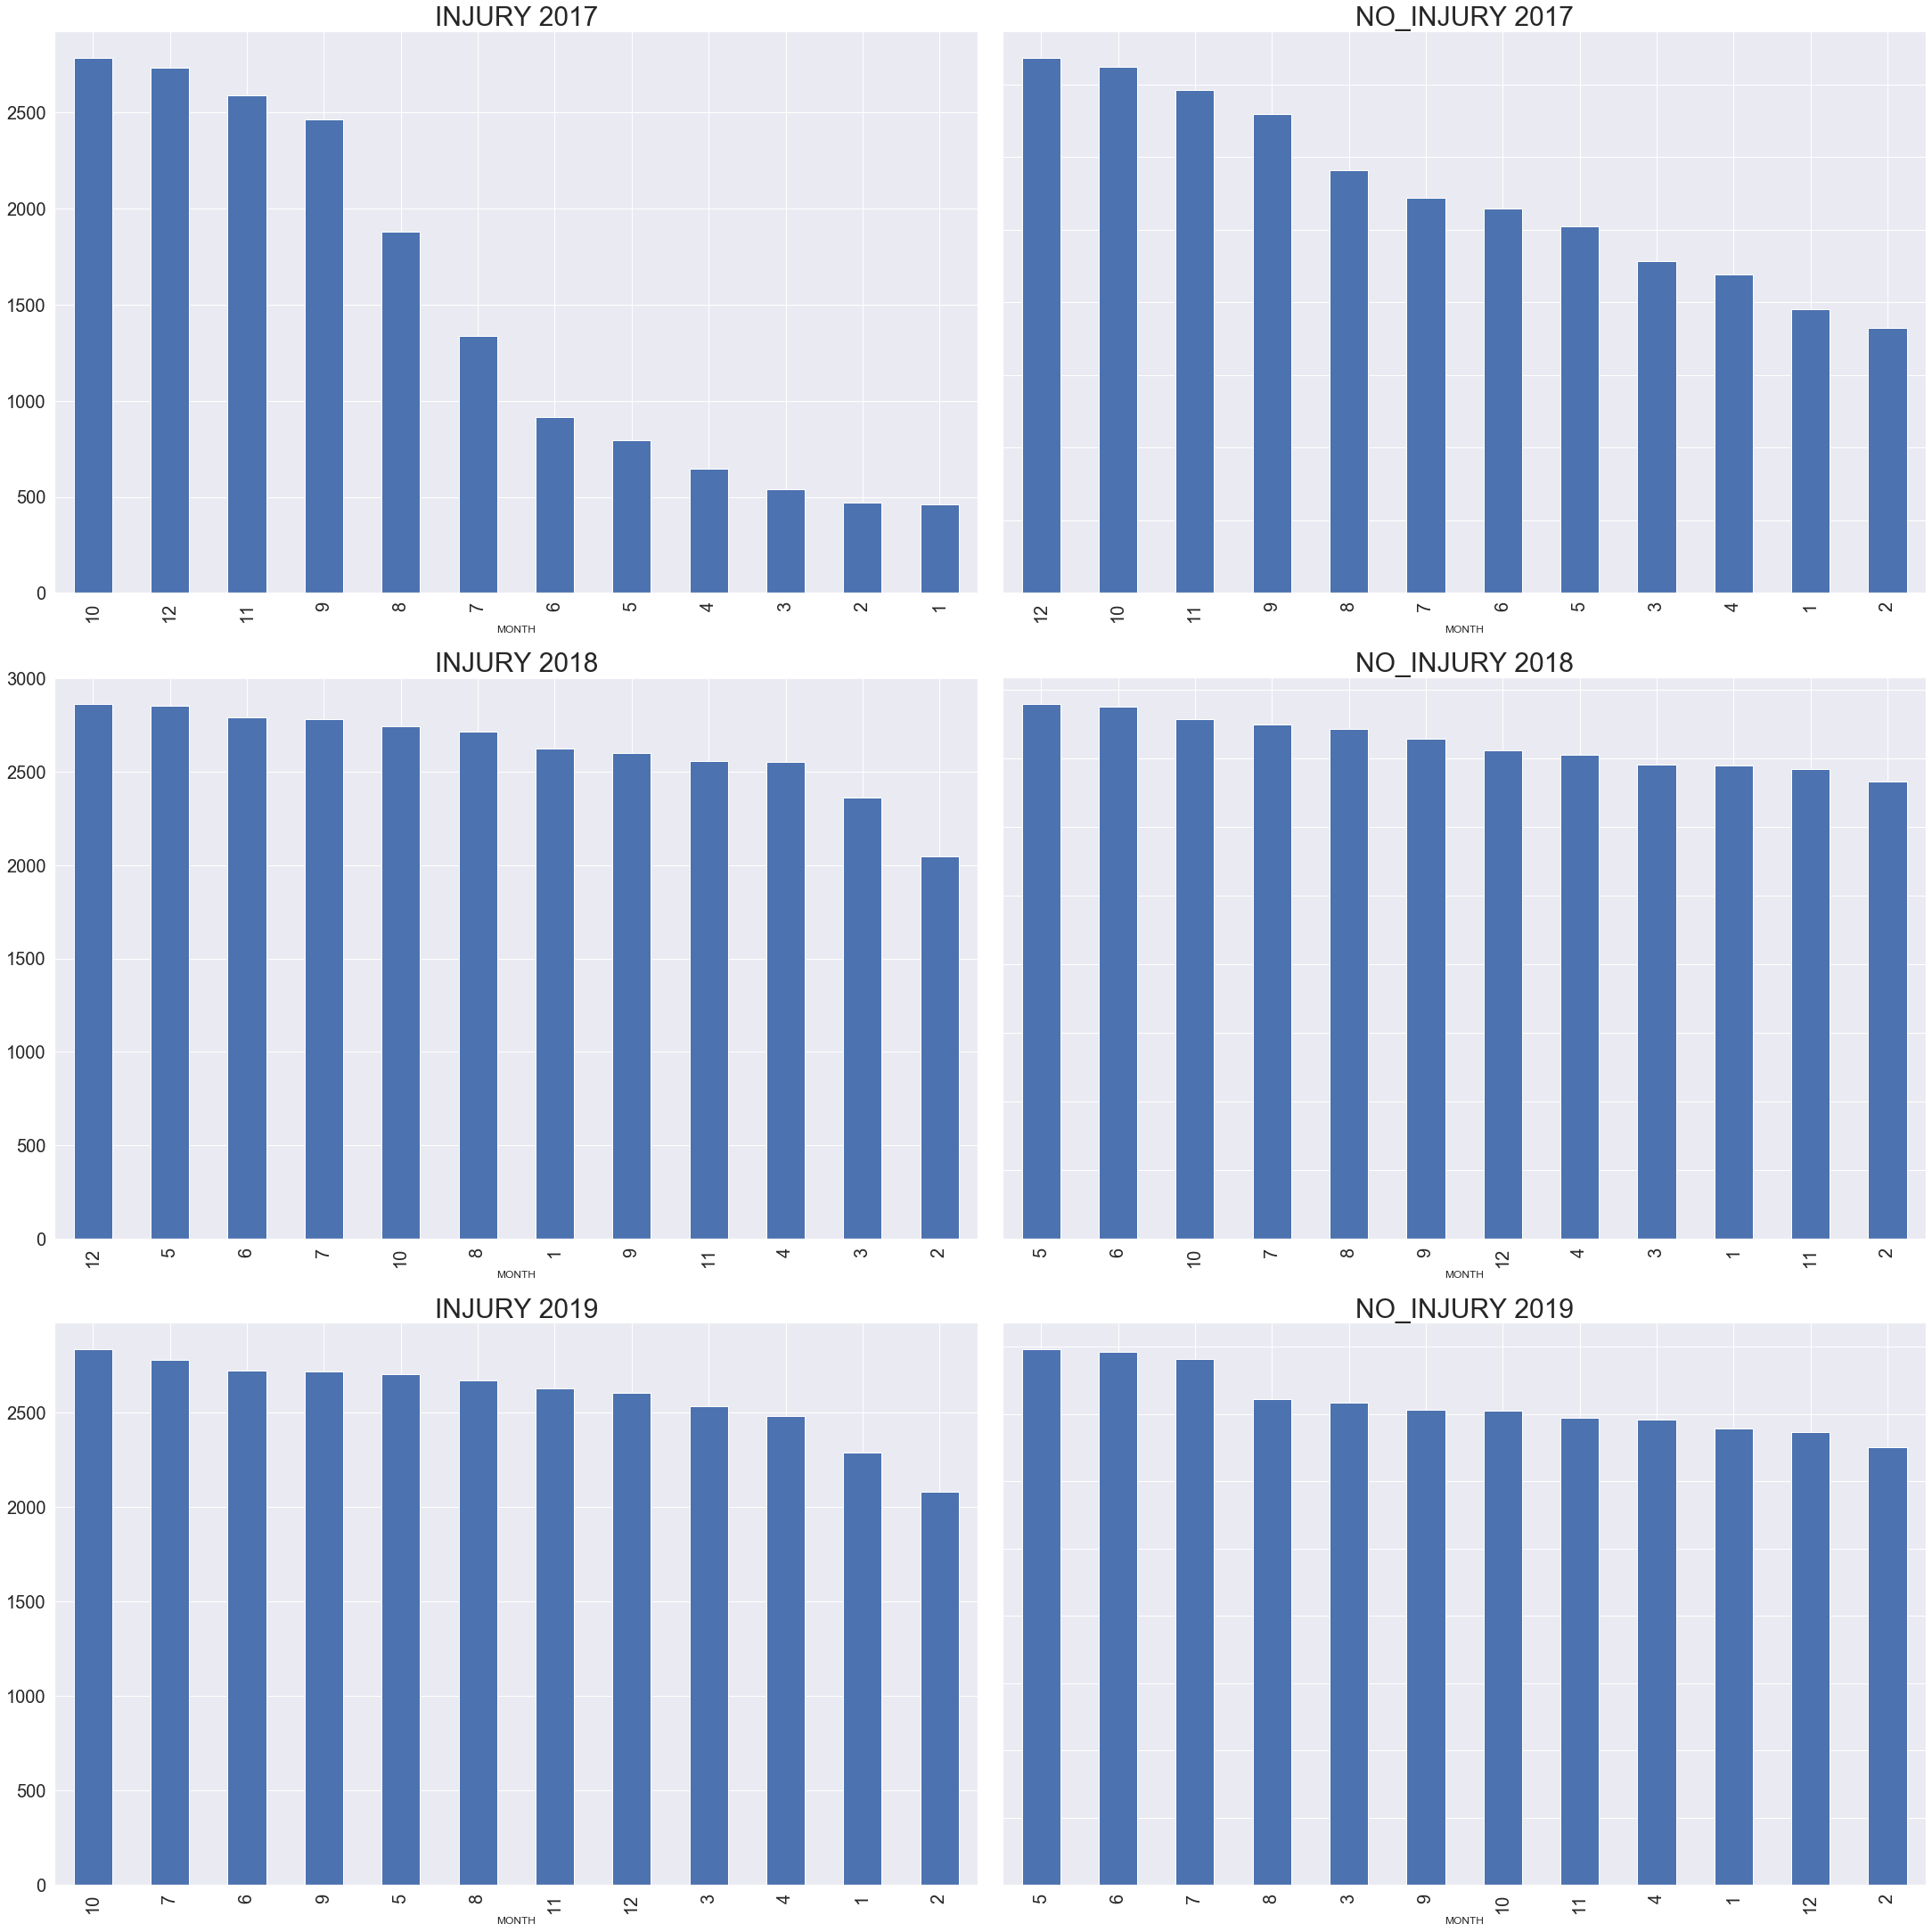

In [61]:
plt.rcParams["figure.figsize"] = (30,30)
f, a = plt.subplots(3,2, frameon=True, sharex=False, constrained_layout=True)


# Plot of 2016 data is very different from 2017 , 2018 and 2019
# so for our analysis , we are considering only 2017 and above 

#df_view = df_bytime.xs('INJURY').xs(2016)
#df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2016', fontsize=20)
#a[0,0].title.set_size(30)

df_view = df_bytime.xs('INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,0], sharey=True, title='INJURY 2017', fontsize=20)
a[0,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2017)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[0,1], sharey=True, title='NO_INJURY 2017', fontsize=20)
a[0,1].title.set_size(30)

df_view = df_bytime.xs('INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,0], sharey=True, title='INJURY 2018', fontsize=20)
a[1,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2018)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[1,1], sharey=True, title='NO_INJURY 2018', fontsize=20)
a[1,1].title.set_size(30)

df_view = df_bytime.xs('INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,0], sharey=True, title='INJURY 2019', fontsize=20)
a[2,0].title.set_size(30)

df_view = df_bytime.xs('NO_INJURY').xs(2019)
df_view.sort_values(ascending=False).plot(kind='bar', ax=a[2,1], sharey=True, title='NO_INJURY 2019', fontsize=20)
a[2,1].title.set_size(30)





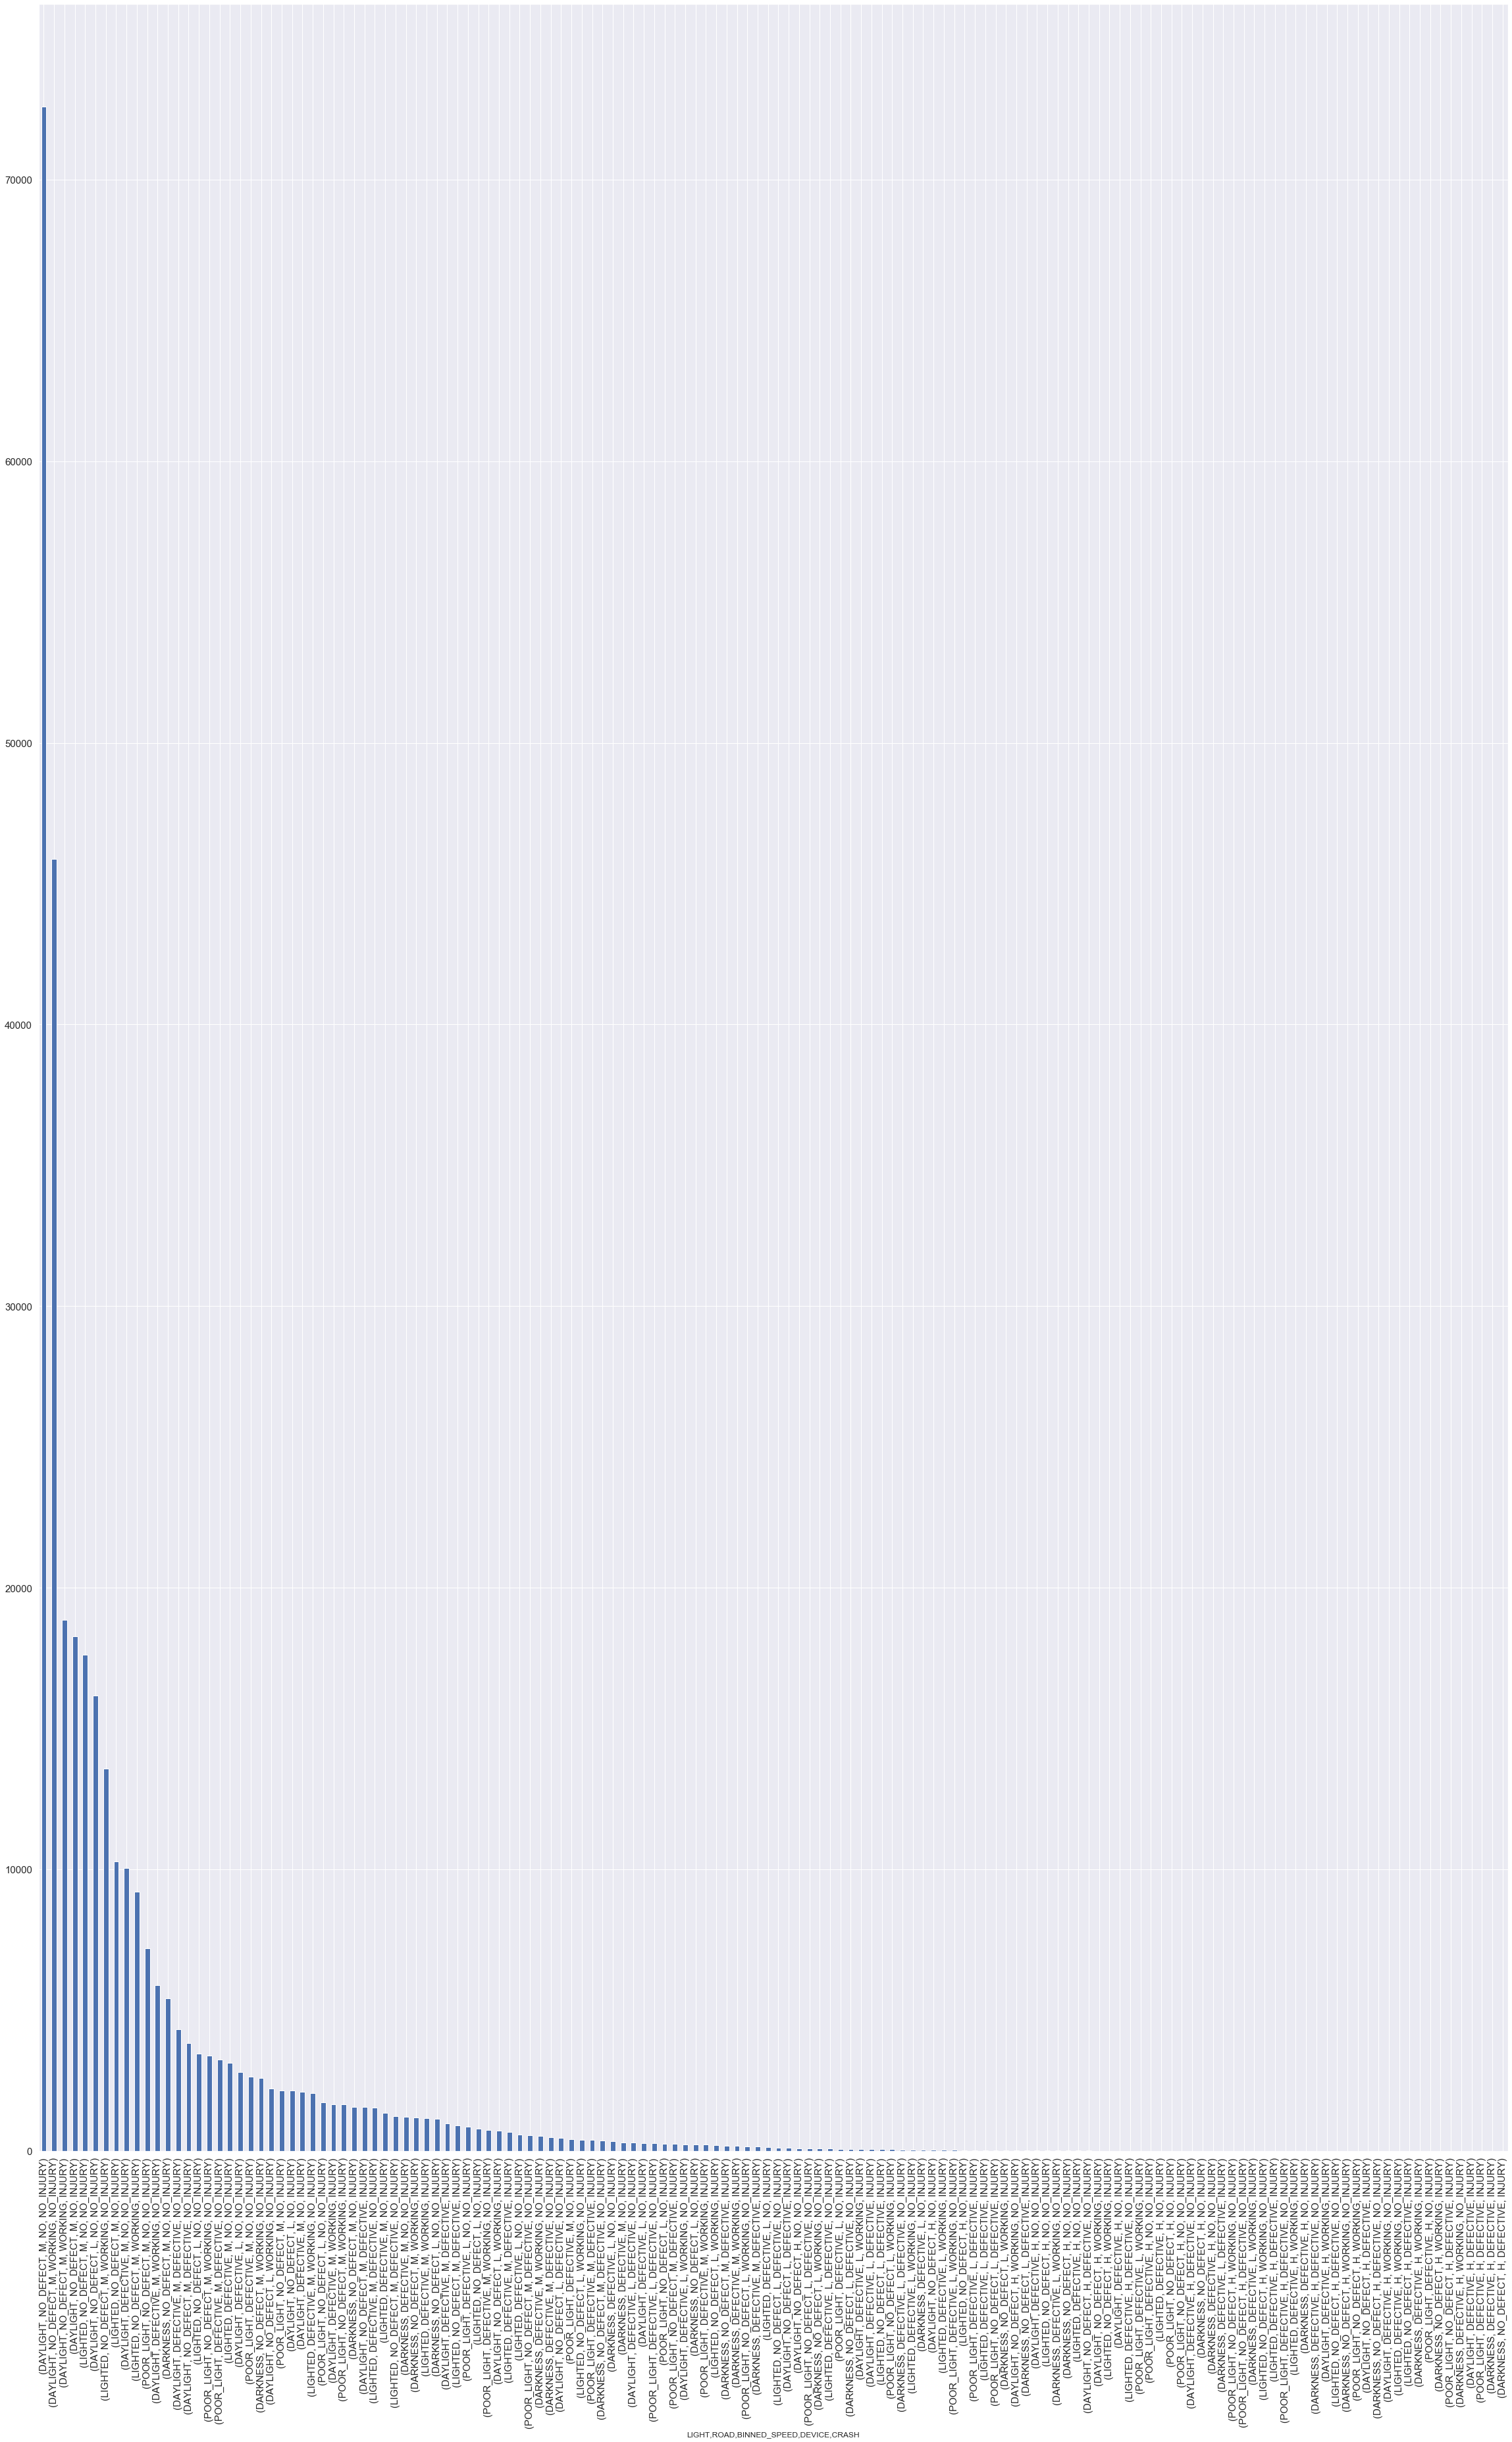

In [62]:
plt.rcParams["figure.figsize"] = (40,60)
df_view = df_crosstab5
df_view.unstack().sort_values(ascending=False).plot(kind='bar', fontsize=15)

In [83]:
df_all5 = df.loc[:,['POSTED_SPEED_LIMIT','ROAD_DEFECT','WEATHER_CONDITION',
              'LIGHTING_CONDITION','CRASH_TYPE','CRASH_DAY_OF_WEEK', 'REPORT_TYPE',
              'NUM_UNITS', 'DEVICE_CONDITION','DAMAGE','STREET_DIRECTION','BEAT_OF_OCCURRENCE']] 

In [84]:
df_s = df_all_copy.copy()

# num_units has missing values, will drop the nas
df_s = df_s.dropna(subset=['NUM_UNITS'], how='any', axis=0)
#Street_direction has one missing value, 
df_s = df_s.dropna(subset=['STREET_DIRECTION'], how= 'any', axis = 0)
#report_type has nan -> 'no report'
df_s['REPORT_TYPE'].fillna('no_report',inplace=True)
#beat of occurence has 3 missing values -> median
df_s['BEAT_OF_OCCURRENCE'].fillna(df_s.BEAT_OF_OCCURRENCE.median(),inplace=True)

In [85]:
# lower case for easy typing
df_s.columns = [x.lower() for x in df_s.columns]

# # Weekday and month and year -> categorical variables
# df_s.weekday=df_s.weekday.astype('object')
# df_s.month=df_s.month.astype('object')
# df_s.year=df_s.year.astype('object')

#getting obj only
obj_df_s = df_s.select_dtypes(include = ['object'])

#review obj_df_s
for i in obj_df_s.columns:
    print('***** Object name: ', obj_df_s[i].name, ': % *****')
    print(obj_df_s[i].value_counts(normalize = True, dropna = False) *100, '\n')

***** Object name:  road : % *****
NO_DEFECT    83.913864
DEFECTIVE    16.086136
Name: road, dtype: float64 

***** Object name:  weather : % *****
CLEAR       78.964547
NO_CLEAR    21.035453
Name: weather, dtype: float64 

***** Object name:  light : % *****
DAYLIGHT      65.502913
LIGHTED       21.267127
POOR_LIGHT     8.183749
DARKNESS       5.046211
Name: light, dtype: float64 

***** Object name:  crash : % *****
NO_INJURY    74.902486
INJURY       25.097514
Name: crash, dtype: float64 

***** Object name:  report_type : % *****
NOT ON SCENE (DESK REPORT)    55.968870
ON SCENE                      41.669358
no_report                      2.361772
Name: report_type, dtype: float64 

***** Object name:  device : % *****
NO           58.039962
WORKING      34.999876
DEFECTIVE     6.960162
Name: device, dtype: float64 

***** Object name:  damage : % *****
OVER $1,500      57.176308
$501 - $1,500    29.253363
$500 OR LESS     13.570328
Name: damage, dtype: float64 

***** Object name:

### check the Class variable Crash
- it is not balanced. 
- we will do downsampling using resample technique
- we will also use label encoder to change 0 and 1

NO_INJURY    241189
INJURY        80815
Name: crash, dtype: int64


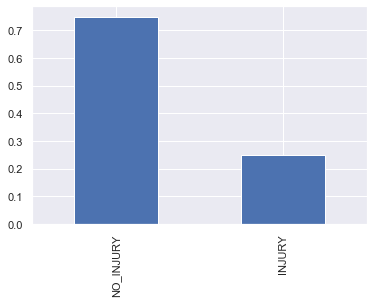

In [86]:
%matplotlib inline

print(obj_df_s['crash'].value_counts())
obj_df_s['crash'].value_counts(normalize=True).plot(kind='bar')

In [87]:
from sklearn import preprocessing
# labelEncoder 0,1
# name change for label encoding (it is alphabetical order..)

df_s['crash'] = df_s['crash'].map({"NO_INJURY":"0_NO_INJURY","INJURY":"1_INJURY" })

le = preprocessing.LabelEncoder()
le.fit(["0_NO_INJURY", "1_INJURY"])
df_s['crash'] = le.transform(df_s['crash'])

In [88]:
# downsampling
from sklearn.utils import resample

df_majority = df_s[df_s.crash == 0]
df_minority = df_s[df_s.crash == 1]
df_majority.shape ;df_minority.shape

(80815, 15)

In [103]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=80815,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.crash.value_counts()
# now we see it is same sample size

1    80815
0    80815
Name: crash, dtype: int64

In [105]:
# convert each categorical feature using one-hot encoding

obj_df = df_downsampled.select_dtypes(include = ['object'])
int_df = df_downsampled.select_dtypes(include = ['int32','float64'])

# onehot encoding
onehot_obj = pd.get_dummies(obj_df, drop_first=True) # dummy trap(one variable can be induced)
print(onehot_obj.columns)

# concat and # reset the index of design_df
design_df = pd.concat([onehot_obj,int_df], axis=1).reset_index()

# order change to make it easy
design_df = design_df[['road_NO_DEFECT', 'weather_NO_CLEAR', 'light_DAYLIGHT',
       'light_LIGHTED', 'light_POOR_LIGHT', 'report_type_ON SCENE',
       'report_type_no_report', 'device_NO', 'device_WORKING',
       'damage_$501 - $1,500', 'damage_OVER $1,500', 'street_direction_N',
       'street_direction_S', 'street_direction_W', 'sp_lim',
       'num_units', 'beat_of_occurrence', 'crash']]
design_df.crash.value_counts()

Index(['road_NO_DEFECT', 'weather_NO_CLEAR', 'light_DAYLIGHT', 'light_LIGHTED',
       'light_POOR_LIGHT', 'report_type_ON SCENE', 'report_type_no_report',
       'device_NO', 'device_WORKING', 'damage_$501 - $1,500',
       'damage_OVER $1,500', 'street_direction_N', 'street_direction_S',
       'street_direction_W'],
      dtype='object')


1    80815
0    80815
Name: crash, dtype: int64

In [106]:
# feature selecting
X = design_df.iloc[:,:-1]
y = design_df.crash

In [107]:
y

0         0
1         0
2         0
3         0
4         0
         ..
161625    1
161626    1
161627    1
161628    1
161629    1
Name: crash, Length: 161630, dtype: int32

In [108]:
# normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [109]:
# train vs test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('Training Features Shape:', X_train.shape)
print('Training Class Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (113141, 17)
Training Class Shape: (113141,)
Testing Features Shape: (48489, 17)
Testing Labels Shape: (48489,)


In [110]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

print('train_score: ', logit_model.score(X_train, y_train))
print('Test_score: ', logit_model.score(X_test, y_test))

y_hat = logit_model.predict(X_test) # get test set precitions

# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# report
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

train_score:  0.7857363820365738
Test_score:  0.7849409144342016
accuracy 0.7849409144342016
confusion matrix
 [[18081  6220]
 [ 4208 19980]]
              precision    recall  f1-score   support

           0       0.81      0.74      0.78     24301
           1       0.76      0.83      0.79     24188

    accuracy                           0.78     48489
   macro avg       0.79      0.79      0.78     48489
weighted avg       0.79      0.78      0.78     48489



In [111]:
# iterate over the coefficients
weights = logit_model.coef_.T # take transpose to make a column vector
variable_names = design_df.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

road_NO_DEFECT has weight of -0.01723914452712584
weather_NO_CLEAR has weight of 0.016811031881976163
light_DAYLIGHT has weight of -0.11295345752339017
light_LIGHTED has weight of 0.06979571714387728
light_POOR_LIGHT has weight of -0.06890653778850009
report_type_ON SCENE has weight of 1.2618338451056215
report_type_no_report has weight of 0.31411585198571657
device_NO has weight of -0.15930754992512847
device_WORKING has weight of 0.054504733818377206
damage_$501 - $1,500 has weight of -0.17092273857220106
damage_OVER $1,500 has weight of 0.34622009824282557
street_direction_N has weight of -0.019769121520790998
street_direction_S has weight of -0.0019156613972112684
street_direction_W has weight of -0.0060633457880265975
sp_lim has weight of 0.20248374072087985
num_units has weight of 0.1304618418910605
beat_of_occurrence has weight of -0.008404176480316425


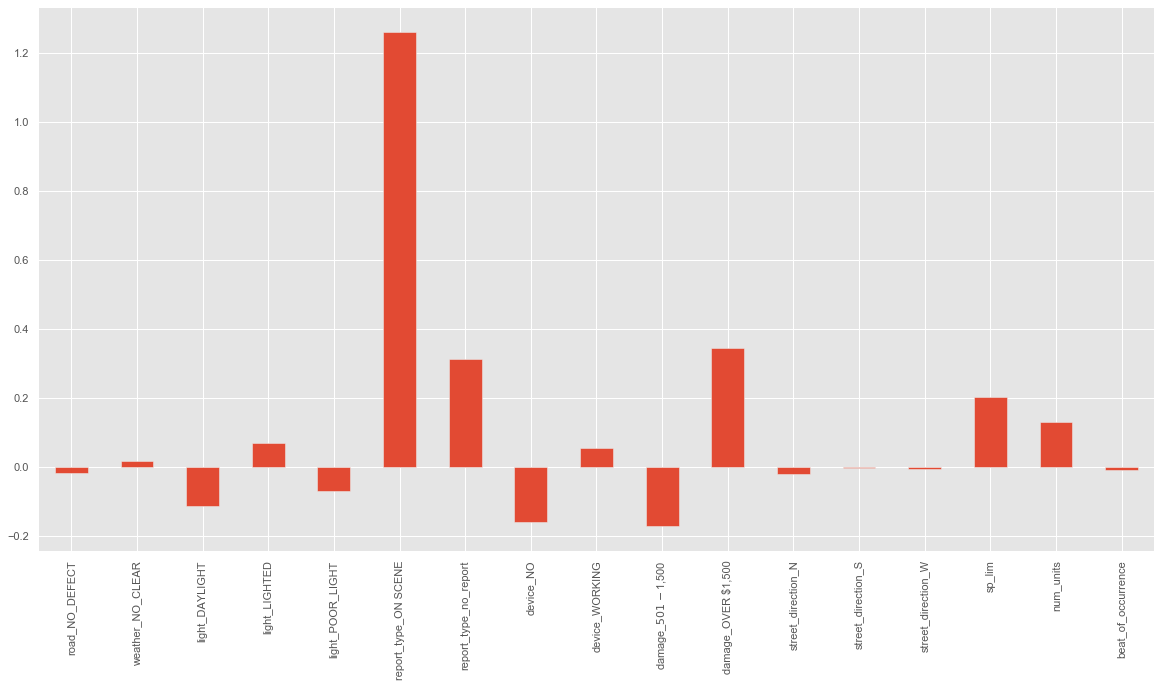

In [113]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(logit_model.coef_[0],index=design_df.iloc[:,:-1].columns)
weights.plot(kind='bar')
plt.show()

In [132]:
# interpretation of weight

from math import exp, expm1
print('Likelihood of INJURY when report type is ON SCENE is ', round((exp(1.26)-1)*100,2),'% more than when report type is NOT ON SCENE.')
print('Likelihood of INJURY when damage is OVER $1,500 is ', round((exp(0.346)-1)*100,2),'% more than when damage is LESS THAN $500.')
print('When num_unit is increased by 1 unit, likelihood of INJURY is increased by', round((exp(0.13)-1)*100,2),'%')

Likelihood of INJURY when report type is ON SCENE is  252.54 % more than when report type is NOT ON SCENE.
Likelihood of INJURY when damage is OVER $1,500 is  41.34 % more than when damage is LESS THAN $500.
When num_unit is increased by 1 unit, likelihood of INJURY is increased by 13.88 %


# Support Vector Machine Model

In [121]:
from sklearn import svm


svm_model = svm.SVC(kernel='rbf')

# fitting
svm_model.fit(X_train, y_train)   

#predict
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[1 1 0 1 1 0 1 0 1 0]
[1 0 1 0 1 0 0 1 0 0]




In [122]:
# performance
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')


# print('train_score: ', svm_model.score(X_train, y_train))
# print('Test_score: ', svm_model.score(X_test, y_test))

svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[18397  5904]
 [ 4386 19802]]


              precision    recall  f1-score   support

           0       0.81      0.76      0.78     24301
           1       0.77      0.82      0.79     24188

    accuracy                           0.79     48489
   macro avg       0.79      0.79      0.79     48489
weighted avg       0.79      0.79      0.79     48489



## Tree model

In [124]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)

tree_model.fit(X_train, y_train)

y_hat = tree_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[1 1 1 1 1 0 1 1 1 0]
[1 0 1 0 1 0 0 1 0 0]


In [125]:
# performance
from sklearn import metrics as mt


acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)


print("accuracy", acc )
print("confusion matrix\n",conf)


tree_report = mt.classification_report(y_test, y_hat)            
print(tree_report)

accuracy 0.7847965517952525
confusion matrix
 [[17514  6787]
 [ 3648 20540]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     24301
           1       0.75      0.85      0.80     24188

    accuracy                           0.78     48489
   macro avg       0.79      0.78      0.78     48489
weighted avg       0.79      0.78      0.78     48489



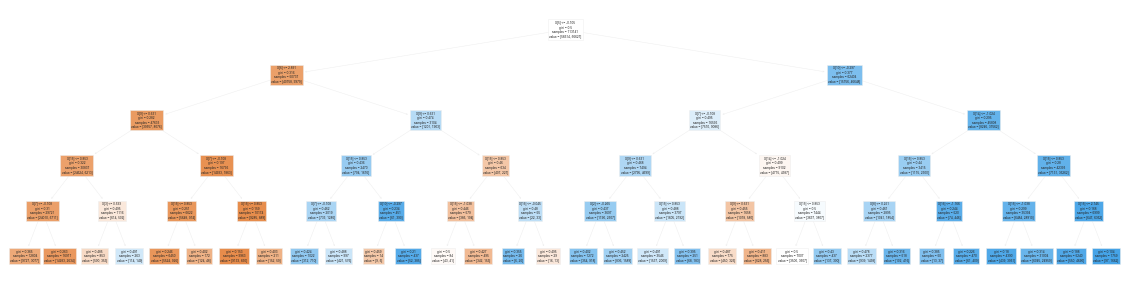

In [126]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize = (20,5))

plot_tree(tree_model, filled=True)
plt.show()

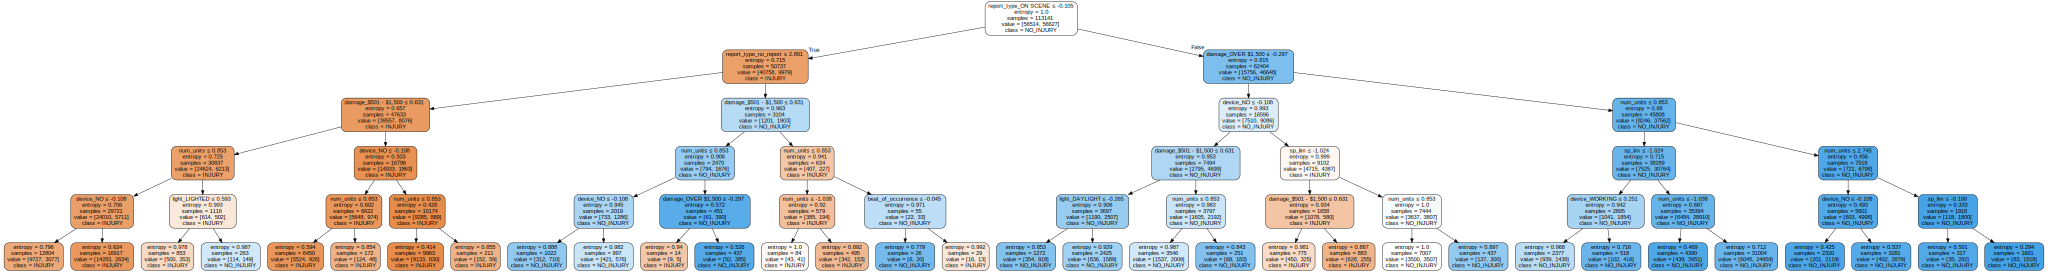

In [128]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
clf = tree_model.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=design_df.iloc[:,:-1].columns,
                                class_names=['INJURY','NO_INJURY'], 
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('tree_cleanlook')
graph

## Model Advantages

#### LRM: Advantage
Logistic regression is appropriate when the dependent variable is dichotomous (binary), such as our target price variable. We were able to use Logistic regression to describe the data and explain the relationship between one dependent binary variable 

#### Disadvantage
Since the LRM is dependent on proper presentation of data. Which means it can be useful only when identification for all the important independent variables have been completed. Such as our examples transforming the data and being able to identify which variables would be useful for the LRM model. It takes more time and effort in order to analyse the dataset to determine what can be proper data to be inserted in the LRM for prediction.
Logistic Regression produces probabilistic values while SVM produces 1 or 0. So in a few words LR makes not absolute prediction and it does not assume data is enough to give a final decision. This maybe be good property when what we want is an estimation or we do not have high confidence into data.

LR is more sensitive to outliers than SVM because the cost function of LR diverges faster than those of SVM
#### SVM: Advantage
SVM tries to find the widest possible separating margin, while Logistic Regression optimizes the log likelihood function, with probabilities modeled by the sigmoid function.

SVM extends by using kernel tricks, transforming datasets into rich features space, so that complex problems can be still dealt with in the same “linear” fashion in the lifted hyper space.

#### Disadvantage
If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

Using both the LR and SVM models, both resulted with an accuracy of prediction ranging from .80 to .81. SVM try to maximize the margin between the closest support vectors while LR the posterior class probability. Thus, SVM find a solution which is as far as possible for the two categories while LR has not this property. Logistic regression does a pretty good job of producing "wide margin" classifiers, since that's all SVM is trying to do (specifically, SVM is trying to "maximize" the margin between the classes. In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function (logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. There was a slight advantage to Logistic regression model. Overall both models were close so there appeared to be no clear advantage except for the level of effort put into each models to predict our target variable.

#### In our case, the SVM model took significantly longer. We could been %timeit for each steps but we are afraid of this will crash notebook. 

## Interpret Support Vectors

In [129]:
# the support vectors
print(svm_model.support_vectors_.shape)
print(svm_model.support_.shape)
print(svm_model.n_support_ )

(52431, 17)
(52431,)
[25745 26686]


In [131]:
print('coef_ is only supported with linear kernal and we have tried to run the model with linear but it crashes our best computer after runing 2 days.')

coef_ is only supported with linear kernal and we have tried to run the model with linear but it crashes our best computer after runing 2 days.
